In [15]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl 
from timple.timedelta import strftimedelta
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import re

In [16]:
ff1.Cache.enable_cache('../cache')

In [40]:
year, event, event_type = 2023, 'Bahrain', 'Q'
session = ff1.get_session(year, event, event_type)
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.1]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tra

In [41]:
driver_1 = 'VER'
laps_driver_1 = session.laps.pick_driver(driver_1)
#idk_mate = laps_driver_1.loc[laps_driver_1['LapNumber'] == 50]
idk_mate = laps_driver_1.pick_fastest()
telemetry = idk_mate.get_telemetry().add_distance()
team_driver_1 = laps_driver_1['Team']

In [42]:
colormap = mpl.cm.plasma

In [43]:
x = idk_mate.telemetry['X']
y = idk_mate.telemetry['Y']
color = idk_mate.telemetry['Speed']

In [44]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [45]:
#plot_size = [15, 20]
lap_time_string = strftimedelta(idk_mate['LapTime'], '%m:%s.%ms')
title = f"{session.event.year} {session.event.EventName} - {session.name} \n {driver_1} {lap_time_string}"
plot_filename = re.sub(r'\W+', '', title.replace("\n", " ")) + ".png"

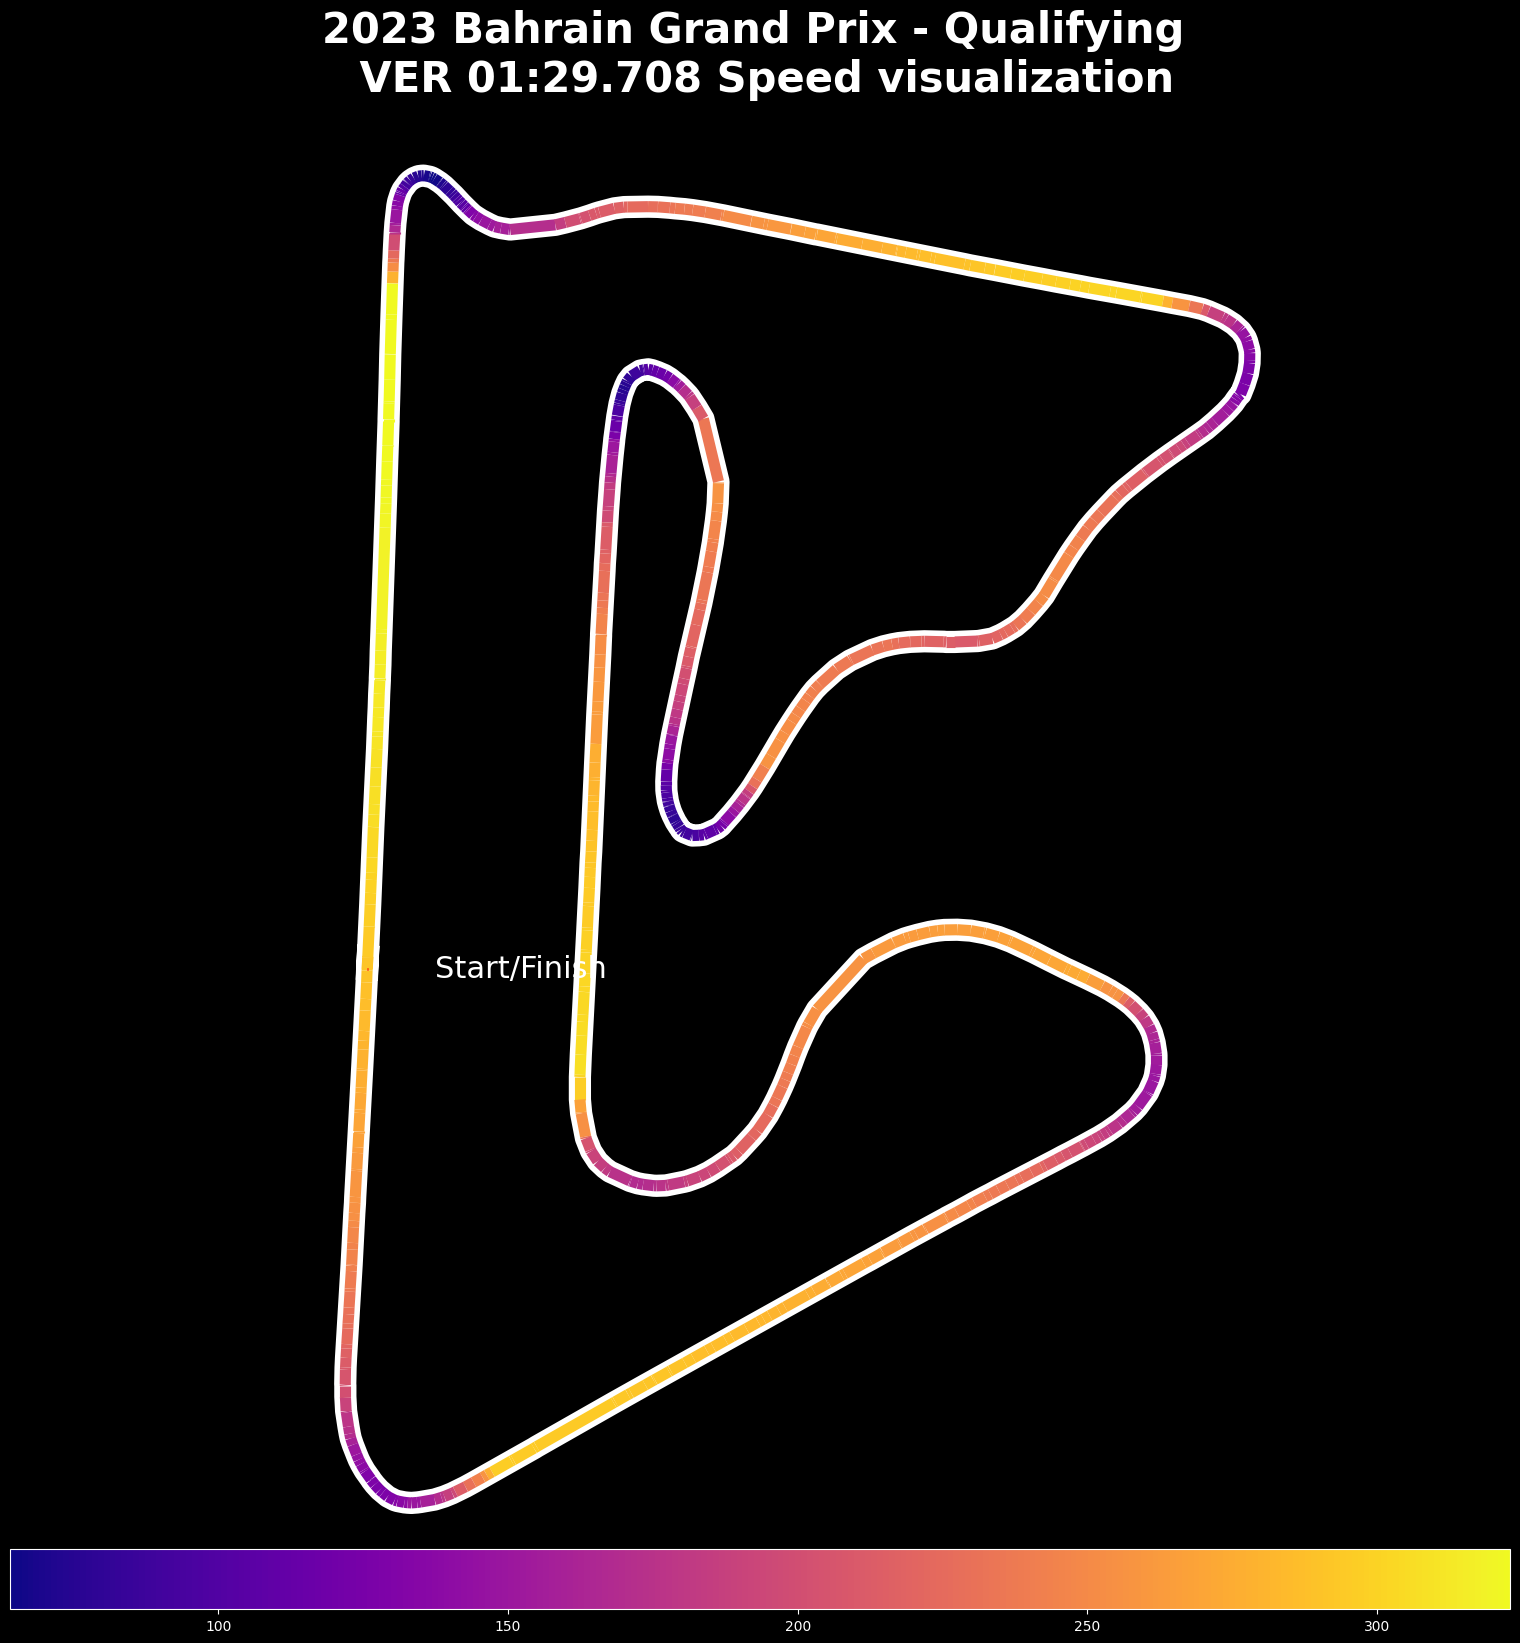

In [47]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True)
plt.suptitle(f"{title} Speed visualization", size = 30, y=0.90, fontweight='bold')
# Adjust margins and turn of axis
plt.style.use('dark_background')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')
plt.subplots_adjust(left=0.1, right=0.95, top=0.85, bottom=0.12)


# After this, we plot the data itself.
# Create background track line
# For vertical tracks
ax.plot(idk_mate.telemetry['X'], idk_mate.telemetry['Y'], color='white', linestyle='-', linewidth=16, zorder=0)
ax.set_aspect('equal', 'box')


# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=8)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)

# Find the y-coordinate of the starting point
start_y = segments[0][0][1]

# Calculate the width of the track
track_width = 9  # This is the value you used for lc_comp.set_linewidth()

# Set the start/finish line width to half of the track width
line_width = track_width / 2

# Draw the start/finish line
xmin = segments[0][0][0]
xmax = xmin + line_width
plt.hlines(y=start_y, xmin=xmin, xmax=xmax, color='red', linestyle='--', linewidth=2)

# Add the "Start/Finish" text
text_x = xmax + 600  # You can adjust the 0.5 value to change the distance between the text and the line
text_y = start_y
plt.text(text_x, text_y, 'Start/Finish', fontsize=22, verticalalignment='center')


# Finally, we create a color bar as a legend.
left_position = (1 - 1) / 2
cbaxes = fig.add_axes([left_position, 0.1, 1, 0.03])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
# plt.rcParams['figure.figsize'] = plot_size
# plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
plt.show()